# Sample solution for Task: Using keras

In [ ]:
import numpy as np
import pandas as pd

### Data

From https://archive.ics.uci.edu/ml/datasets/heart+Disease

> **target**: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

> **sex**: sex (1 = male; 0 = female)

> **cp**: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

In [ ]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [ ]:
df_new = pd.get_dummies(df, columns=["sex", "cp", "thal"])


Note: 
* We now would ideally drop one of the one-hot encoded columns to avoid perfect multicollinearity.
* We wouldn't even have to dummy-encode "sex" column, since it only contains two values, so it's already boolean-encoded.

### Train-valid-test split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
targetcol = "target"
X = df_new.drop(targetcol, axis=1).values
y = df_new[targetcol].values

print(X.shape, y.shape)

(303, 22) (303,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_val.shape, "\n", y_val.shape,
      "\n", X_test.shape, "\n", y_test.shape)

 (212, 22) 
 (212,) 
 (46, 22) 
 (46,) 
 (45, 22) 
 (45,)


Scaled data:

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_scaled = scaler.transform(X)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("", X_train_scaled.shape, "\n", y_train.shape, 
      "\n", X_val_scaled.shape, "\n", y_val.shape,
      "\n", X_test_scaled.shape, "\n", y_test.shape)

 (212, 22) 
 (212,) 
 (46, 22) 
 (46,) 
 (45, 22) 
 (45,)


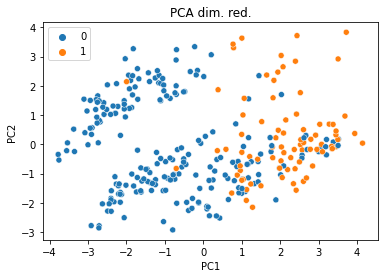

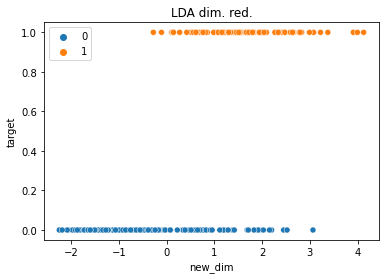

In [ ]:
## a little extra: visualization after decomposition
import seaborn as sns
import matplotlib.pyplot as plt

## dimred with PCA into 2D
from sklearn.decomposition import PCA
pca = PCA(2)
X_transformed = pca.fit_transform(X_scaled)
sns.scatterplot(data=pd.DataFrame(X_transformed, columns=["PC1", "PC2"]),
                x="PC1", y="PC2", hue=y);
plt.title("PCA dim. red.")
plt.show()

## dimred with PCA into 1D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_transformed = lda.fit_transform(X=X_scaled, y=y)
sns.scatterplot(x=X_transformed[:,0], y=y, hue=y)
plt.xlabel("new_dim")
plt.ylabel("target")
plt.title("LDA dim. red.")
plt.show()

### Keras model using sequential API

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [ ]:
def create_model():

    tf.keras.backend.clear_session()

    model = Sequential()

    model.add(Dense(units=3, activation='sigmoid', input_shape=(X.shape[1],))) 

    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return model

In [ ]:
def create_and_fit_model(X_train, y_train, X_val, y_val, num_epochs, num_batchsize):
    tf.keras.utils.set_random_seed(42)
    model = create_model()
    print(model.summary())

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=num_batchsize, 
                        validation_data=(X_val, y_val),
                        )
                        
    historydf = pd.DataFrame(history.history)
    historydf.plot(xlabel="epoch", secondary_y=[c for c in historydf.columns if c.endswith("loss")]);

    return model, historydf

Model fit parameters

In [ ]:
num_epochs = 100
num_batchsize = 32

#### Do fitting

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 69        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
7/7 [==============================] - 1s 38ms/step - loss: 0.8197 - accuracy: 0.2783 - val_loss: 0.8145 - val_accuracy: 0.2826
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.8151 - accuracy: 0.2783 - val_loss: 0.8100 - val_accuracy: 0.2826
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.8106 - accuracy: 0.2783 - val_loss: 0.8056 - val_accuracy: 0.2826
Epoch 4/100
7/7 [================

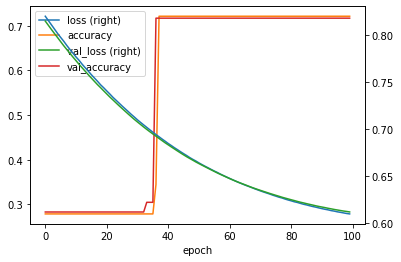

In [ ]:
model, historydf = create_and_fit_model(X_train, y_train, X_val, y_val, num_epochs, num_batchsize)

Create a model and fit on scaled data

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 69        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
7/7 [==============================] - 1s 34ms/step - loss: 0.9475 - accuracy: 0.2783 - val_loss: 0.9106 - val_accuracy: 0.2826
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.9350 - accuracy: 0.2783 - val_loss: 0.8984 - val_accuracy: 0.2826
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.9232 - accuracy: 0.2783 - val_loss: 0.8864 - val_accuracy: 0.2826
Epoch 4/100
7/7 [===============

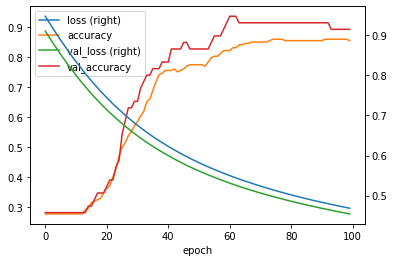

In [ ]:
model_scaled, historydf_scaled = create_and_fit_model(X_train_scaled, y_train, X_val_scaled, y_val, num_epochs, num_batchsize)

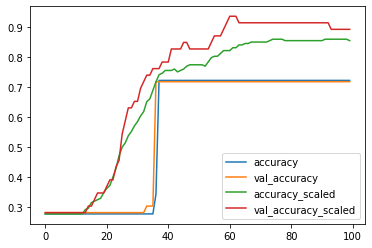

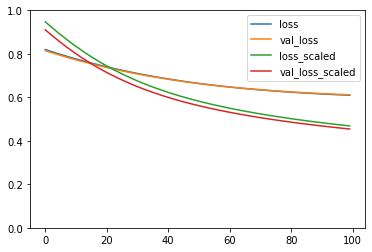

In [ ]:
allhistory = historydf.merge(historydf_scaled,right_index=True, left_index=True, suffixes=["", "_scaled"])
allhistory[[c for c in allhistory.columns if "accuracy" in c]].plot();
allhistory[[c for c in allhistory.columns if "loss" in c]].plot(ylim=(0,1));

## Same model with functional API

In [ ]:
from tensorflow.keras import Input, Model

In [ ]:
def create_model():

    tf.keras.backend.clear_session()

    input_layer = Input(shape=(X.shape[1],))

    layer1 = Dense(3, activation='sigmoid')(input_layer)

    output_layer = Dense(1, activation="sigmoid")(layer1)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense (Dense)               (None, 3)                 69        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
7/7 [==============================] - 1s 30ms/step - loss: 0.8197 - accuracy: 0.2783 - val_loss: 0.8145 - val_accuracy: 0.2826
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.8151 - accuracy: 0.2783 - val_loss: 0.8100 - val_accuracy: 0.2826
Epoch 3/100
7/7 [============================

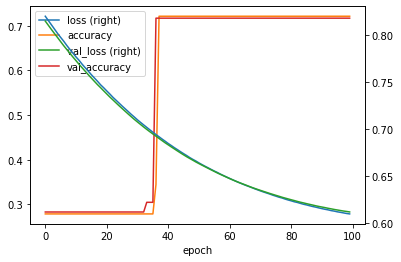

In [ ]:
model, historydf = create_and_fit_model(X_train, y_train, X_val, y_val, num_epochs, num_batchsize)

## Evaluate on test set

In [ ]:
(model_loss, model_accuracy) = model.evaluate(X_test, y_test)


2/2 [==============================] - 0s 5ms/step - loss: 0.5912 - accuracy: 0.7556


In [ ]:
(model_scaled_loss, model_scaled_accuracy) = model_scaled.evaluate(X_test_scaled, y_test)


2/2 [==============================] - 0s 6ms/step - loss: 0.4830 - accuracy: 0.8222


In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred_scaled = model_scaled.predict(X_test_scaled)

2/2 [==============================] - 0s 7ms/step


In [ ]:
y_test_pred_cl = y_test_pred.round().flatten().astype(int)
y_test_pred_cl_scaled = y_test_pred_scaled.round().flatten().astype(int)

In [ ]:
from sklearn import metrics

In [ ]:
print("Non-scaled:")
print(metrics.classification_report(y_test, y_test_pred_cl))

print("\nScaled:")
print(metrics.classification_report(y_test, y_test_pred_cl_scaled))

Non-scaled:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        34
           1       0.00      0.00      0.00        11

    accuracy                           0.76        45
   macro avg       0.38      0.50      0.43        45
weighted avg       0.57      0.76      0.65        45


Scaled:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.64      0.64      0.64        11

    accuracy                           0.82        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.82      0.82      0.82        45



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
